In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
cmny_data= pd.read_csv("C:\\Users\\sathya\\Documents\\assignments\\Company_Data.csv")

In [3]:
cmny_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cmny_data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
cmny_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
cmny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
cmny_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
cmny_data['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [9]:
cmny_data['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [10]:
#Looking into median to check the median-- middle value, which can help us in Stratified sampling
np.median(cmny_data["Sales"])

7.49

In [11]:
cmny_data["sales"]="<=7.49"
cmny_data.loc[cmny_data["Sales"]>=7.49,"sales"]=">=7.49"

In [12]:
y=cmny_data["Sales"]
X=cmny_data.drop(["Sales"],axis=1,inplace=True)

In [13]:
cmny_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [16]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in cmny_data.columns:
    if cmny_data[column_name].dtype == object:
        cmny_data[column_name] = le.fit_transform(cmny_data[column_name])
    else:
        pass

In [17]:
#Splitting the data into input and output
featues = cmny_data.iloc[:,0:10]
labels = cmny_data.iloc[:,10]

In [18]:
#Splitting the data into train and test by using stratify sampling
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(featues,labels,test_size = 0.2,stratify = labels) 

In [19]:
#Looking into the class variable split
print(y_train.value_counts())
print(y_test.value_counts())

1    161
0    159
Name: sales, dtype: int64
1    40
0    40
Name: sales, dtype: int64


In [20]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
#Predicting on training data
pred_train = model.predict(x_train)

In [22]:
#Accuracy on training data
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,pred_train)
print(accuracy_train)

0.690625


In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
con_train = confusion_matrix(y_train,pred_train)

In [24]:
#Prediction on test data
pred_test = model.predict(x_test)

In [25]:
#Accuracy on test data
accuracy_test = accuracy_score(y_test,pred_test)
print(accuracy_test)

0.6875


In [26]:
np.mean(y_test==pred_test)

0.6875

In [27]:
#using decision Tree regressor
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [28]:
#array = cmny_data.values
#X = array[:,0:10]
#y = array[:,0]

#cmny_data.iloc[:,0:10]
#labels = cmny_data.iloc[:,10]

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.725

In [32]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [33]:
cmny = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

In [34]:
cmny

,max_depth,train_acc,test_acc
0,1,0.615625,0.6125
1,2,0.615625,0.6125
2,3,0.690625,0.6875
3,4,0.759375,0.6250
4,5,0.846875,0.7000
5,6,0.900000,0.7375
6,7,0.921875,0.7500
7,8,0.959375,0.7375
8,9,0.968750,0.7375
9,10,0.987500,0.7625


In [35]:
#PLot the decision tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image


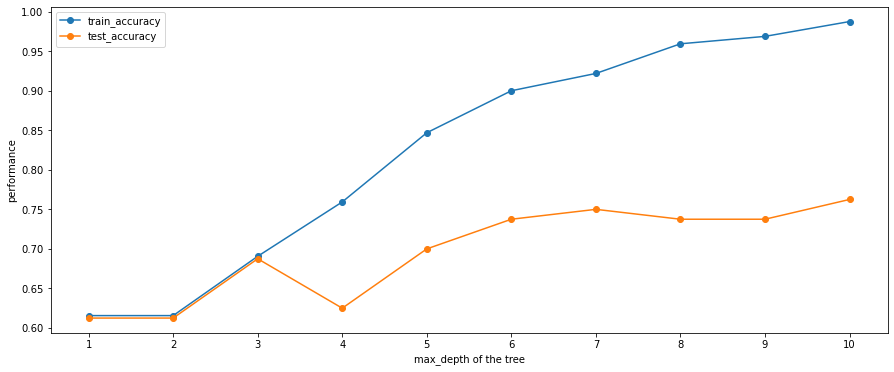

In [36]:
# visulizing accuracy graph to look over max_depth
labels =['train_accuracy','test_accuracy']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(cmny['max_depth'], cmny['train_acc'], marker = 'o')
plt.plot(cmny['max_depth'], cmny['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [37]:
# Model Building
def hyper_tuned_model(criterion,max_depth, x_train, y_train, x_test, y_test):
    model1 = DecisionTreeClassifier(criterion=criterion, random_state=10, max_depth=max_depth)
    print(model1.fit(x_train, y_train))
    print('train_score:',model1.score(x_train, y_train))
    print('test_score:',model1.score(x_test, y_test))

In [38]:
y_pred = model1.predict(x_test)

In [39]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [40]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[29, 11],
       [ 8, 32]], dtype=int64)

In [41]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        40
           1       0.74      0.80      0.77        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [ ]:
# decision tree for company dataset  given random accuracy i got 78% at my first attempt, kernal restart reduce the accuracy,
#i add visualiztion for the max_depth of the tree..